In [1]:
# No need to install for Colab, but keep in mind what we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Load the UCI Adult Income dataset from online source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url)

# Display first few rows
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Load the UCI Adult Income dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, header=None, names=column_names)

# Display first few rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Drop missing values
df = df.replace('?', np.nan)
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


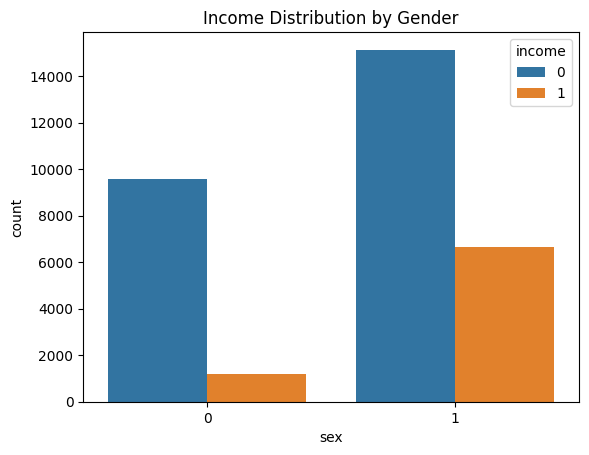

In [7]:
# Gender vs Income distribution
sns.countplot(x='sex', hue='income', data=df)
plt.title("Income Distribution by Gender")
plt.show()

In [8]:
# Features and label
X = df.drop('income', axis=1)
y = df['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8076155381544603

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4942
           1       0.68      0.37      0.48      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
!pip install shap

In [10]:
import shap

#create an explainer object
explainer = shap.Explainer(model, X_test)

# get SHAP values for the test set
shap_values = explainer(X_test)

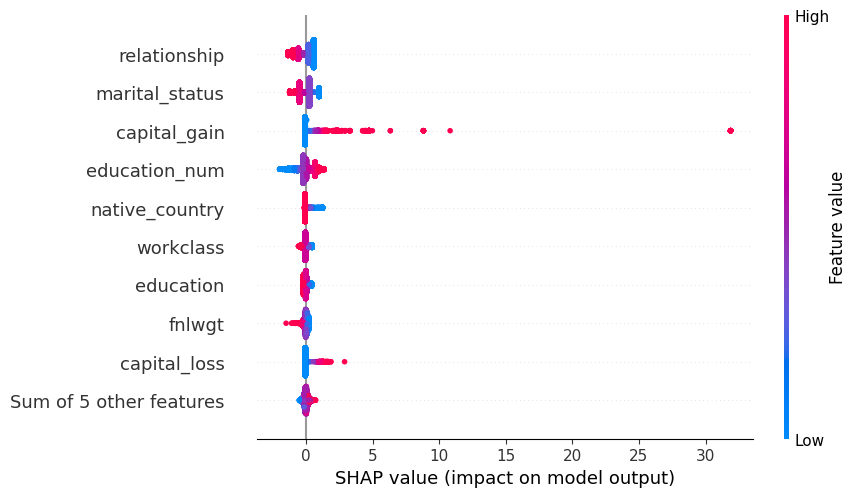

In [11]:
# visualize global feature importance
shap.plots.beeswarm(shap_values)

In [12]:
# Add 'sex' column back to test set
X_test_copy = X_test.copy()
X_test_copy['sex'] = df['sex'].iloc[X_test.index]
X_test_copy['actual'] = y_test
X_test_copy['predicted'] = model.predict(X_test)

# Accuracy for each gender
female_acc = accuracy_score(X_test_copy[X_test_copy['sex'] == 0]['actual'],
                            X_test_copy[X_test_copy['sex'] == 0]['predicted'])
male_acc = accuracy_score(X_test_copy[X_test_copy['sex'] == 1]['actual'],
                          X_test_copy[X_test_copy['sex'] == 1]['predicted'])

print(f"Female Accuracy: {female_acc:.2f}")
print(f"Male Accuracy: {male_acc:.2f}")

Female Accuracy: 0.89
Male Accuracy: 0.77


In [13]:
# Re-attach 'sex' column to the test data
X_test_copy = X_test.copy()
X_test_copy['sex'] = df['sex'].iloc[X_test.index]
X_test_copy['actual'] = y_test
X_test_copy['predicted'] = model.predict(X_test)

# Calculate accuracy for each gender
from sklearn.metrics import accuracy_score

female_acc = accuracy_score(
    X_test_copy[X_test_copy['sex'] == 0]['actual'],
    X_test_copy[X_test_copy['sex'] == 0]['predicted']
)

male_acc = accuracy_score(
    X_test_copy[X_test_copy['sex'] == 1]['actual'],
    X_test_copy[X_test_copy['sex'] == 1]['predicted']
)

print(f"📊 Female Accuracy: {female_acc:.2f}")
print(f"📊 Male Accuracy:   {male_acc:.2f}")

📊 Female Accuracy: 0.89
📊 Male Accuracy:   0.77
